# Overview
The script reads an mtx file called sample_4.mtx in the sample_dataset folder.  
It then displays it in a cytoscape graph.  
Requires the ipysytoscape library and Python 3  
Tested on jupyter notebook with version pandas version 1.3.4

In [1]:
!pip install ipycytoscape

In [2]:
!pip install pandas

In [3]:
# Import all important libraries
from scipy.io import mmread
from scipy.io import mminfo
import pandas as pd
import numpy as np
import requests
# For reading the file
import os
import sys

# For transforming into cytoscape
import ipycytoscape
import json
import ipywidgets

# Double checking versions
print(pd.__version__) #had 1.3.4
print(ipycytoscape.__version__) #had 1.3.2
print(json.__version__) #had 2.0.9
print(ipywidgets.__version__) #had 7.6.5

2.2.2
1.3.3
2.0.9
8.1.3


In [4]:
# Set path and open file for reading
# filespec = os.fspath('../sample_dataset/sample_4.mtx')
# stream = open(filespec, 'r')

In [5]:
# #line = stream.readline()
# # Skip lines that start with %
# while line and line[0] in ['%', 37]:
#     line = stream.readline()
# # Skip empty lines
# while not line.strip():
#     line = stream.readline()

In [6]:
import requests
import pandas as pd
import json

# Define the API URL
URL = 'https://api.opendata.ocs.oraclecloud.com/data/landsat-4-5-tm/'


In [7]:
def fetch_json_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return None

data = fetch_json_data(URL)


In [8]:
def print_json_data(data):
    print("JSON Data:", json.dumps(data, indent=2))

if data:
    print_json_data(data)


JSON Data: {
  "objects": [],
  "prefixes": [
    "001/"
  ],
  "nextStartWith": "001/058/LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF"
}


In [9]:
def extract_relevant_parts(data):
    objects = data.get('objects', [])
    prefixes = data.get('prefixes', [])
    next_start_with = data.get('nextStartWith', '')
    return objects, prefixes, next_start_with

objects, prefixes, next_start_with = extract_relevant_parts(data)

def print_extracted_parts(objects, prefixes, next_start_with):
    print("Objects:", objects)
    print("Prefixes:", prefixes)
    print("Next Start With:", next_start_with)

print_extracted_parts(objects, prefixes, next_start_with)


Objects: []
Prefixes: ['001/']
Next Start With: 001/058/LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF


In [10]:
def initialize_data_structures():
    return [], [], 1  # edge_array, node_array, counter

edge_array, node_array, counter = initialize_data_structures()


In [11]:
def process_line(line, edge_array, node_array, counter):
    if line and line[0] not in ['%', '37']:
        split_line = line.split('/')
        print("Split line:", split_line)
        
        numeric_parts = [part for part in split_line if part.isdigit()]
        if len(numeric_parts) >= 2:
            try:
                rows, cols = map(int, numeric_parts[:2])
                entries = 1  # Default entries to 1 if not specified
                
                print("rows: ", rows, " cols: ", cols, " entries: ", entries)
                
                node_source = {'id': rows, 'label': rows, 'classes': rows}
                node_target = {'id': cols, 'label': cols, 'classes': cols}
                if node_source not in node_array:
                    node_array.append(node_source)
                if node_target not in node_array:
                    node_array.append(node_target)
                
                edge_entry = {'id': 'line ' + str(counter), 'source': rows, 'target': cols, 'weight': entries}
                edge_array.append(edge_entry)
                
                counter += 1
            except ValueError:
                print(f"Skipping invalid line due to ValueError: {line}")
        else:
            print(f"Skipping invalid line: {line}")
    return edge_array, node_array, counter

edge_array, node_array, counter = process_line(next_start_with, edge_array, node_array, counter)


Split line: ['001', '058', 'LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF']
rows:  1  cols:  58  entries:  1


In [12]:
def convert_to_dataframe(edge_array, node_array):
    node_df = pd.DataFrame(node_array)
    edge_df = pd.DataFrame(edge_array, columns=['id', 'source', 'target', 'weight'])
    return node_df, edge_df

node_df, edge_df = convert_to_dataframe(edge_array, node_array)

def print_dataframes(node_df, edge_df):
    print("Node DataFrame Columns:", node_df.columns)
    print("Node DataFrame:")
    print(node_df)
    print("\nEdge DataFrame:")
    print(edge_df)

print_dataframes(node_df, edge_df)


Node DataFrame Columns: Index(['id', 'label', 'classes'], dtype='object')
Node DataFrame:
   id  label  classes
0   1      1        1
1  58     58       58

Edge DataFrame:
       id  source  target  weight
0  line 1       1      58       1


In [13]:
def assign_node_colors(node_df):
    if not node_df.empty:
        node_df['background-color'] = 'red'
        node_df.loc[node_df['id'] <= 40, 'background-color'] = 'blue'
        node_df.loc[node_df['id'] >= 100, 'background-color'] = 'orange'
    return node_df

node_df = assign_node_colors(node_df)


In [14]:
def main():
    data = fetch_json_data(URL)
    if data:
        print_json_data(data)
        objects, prefixes, next_start_with = extract_relevant_parts(data)
        print_extracted_parts(objects, prefixes, next_start_with)
        edge_array, node_array, counter = initialize_data_structures()
        edge_array, node_array, counter = process_line(next_start_with, edge_array, node_array, counter)
        node_df, edge_df = convert_to_dataframe(edge_array, node_array)
        node_df = assign_node_colors(node_df)
        print_dataframes(node_df, edge_df)

main()


JSON Data: {
  "objects": [],
  "prefixes": [
    "001/"
  ],
  "nextStartWith": "001/058/LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF"
}
Objects: []
Prefixes: ['001/']
Next Start With: 001/058/LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF
Split line: ['001', '058', 'LT05_L1TP_001058_20110430_20200822_02_T1_VAA.TIF']
rows:  1  cols:  58  entries:  1
Node DataFrame Columns: Index(['id', 'label', 'classes', 'background-color'], dtype='object')
Node DataFrame:
   id  label  classes background-color
0   1      1        1             blue
1  58     58       58              red

Edge DataFrame:
       id  source  target  weight
0  line 1       1      58       1


In [15]:
def convert_to_dict_records(nodes_df, edges_df):
    nodes_dict = nodes_df.to_dict('records')
    edges_dict = edges_df.to_dict('records')
    return nodes_dict, edges_dict


In [16]:
def build_nodes_graph_list(nodes_dict):
    data_keys = ['id', 'label', 'classes']
    position_keys = ['position_x', 'position_y']
    rest_keys = ['score', 'idInt', 'name', 'group', 'removed', 'selected', 'selectable', 'locked', 'grabbed', 'grabbable']

    nodes_graph_list = []
    for node in nodes_dict:
        data_sub_dict = {'data': {el: node[el] for el in data_keys}}
        rest_sub_dict = {el: node[el] for el in node.keys() if el in rest_keys}
        posi_sub_dict = {}
        if 'position_x' in node.keys() and 'position_y' in node.keys():
            posi_sub_dict = {'position': {el: node[el] for el in position_keys}}

        dict_node = {**data_sub_dict, **rest_sub_dict, **posi_sub_dict}
        nodes_graph_list.append(dict_node)

    return nodes_graph_list


In [17]:
def build_edges_graph_list(edges_dict):
    data_keys = ['id', 'source', 'target']
    data_keys2 = ['label', 'classes']
    rest_keys = ['score', 'weight', 'group', 'networkId', 'networkGroupId', 'intn', 'rIntnId', 'removed', 'selected', 'selectable', 'locked', 'grabbed', 'grabbable']

    edges_graph_list = []
    for edge in edges_dict:
        data_sub_dict = {el: edge[el] for el in data_keys}
        data_sub_dict2 = {el: edge[el] for el in edge.keys() if el in data_keys2}
        rest_sub_dict = {el: edge[el] for el in edge.keys() if el in rest_keys}

        dict_edge = {'data': {**data_sub_dict, **data_sub_dict2}, **rest_sub_dict}
        edges_graph_list.append(dict_edge)

    return edges_graph_list


In [18]:
def build_style_elements_list(nodes_dict, edges_dict):
    all_node_style = ['background-color', 'background-opacity', 'font-family', 'font-size', 'label', 'width', 'shape', 'height', 'text-valign', 'text-halign']
    all_edge_style = ['background-color', 'background-opacity', 'font-family', 'font-size', 'label', 'width', 'line-color']

    style_elements = []
    for node in nodes_dict:
        node_dict = {'selector': f'node[id = "{node["id"]}"]'}
        style_dict = {"style": {el: node[el] for el in node.keys() if el in all_node_style}}
        node_dict.update(style_dict)
        style_elements.append(node_dict)

    for edge in edges_dict:
        edge_dict = {'selector': f'edge[id = "{edge["id"]}"]'}
        style_dict = {"style": {el: edge[el] for el in edge.keys() if el in all_edge_style}}
        edge_dict.update(style_dict)
        style_elements.append(edge_dict)

    return style_elements


In [19]:
import ipycytoscape

def transform_into_ipycytoscape(nodes_df, edges_df):
    nodes_dict, edges_dict = convert_to_dict_records(nodes_df, edges_df)
    
    nodes_graph_list = build_nodes_graph_list(nodes_dict)
    edges_graph_list = build_edges_graph_list(edges_dict)
    
    total_graph_dict = {'nodes': nodes_graph_list, 'edges': edges_graph_list}

    style_elements = build_style_elements_list(nodes_dict, edges_dict)

    data_graph = json.dumps(total_graph_dict)
    json_to_python = json.loads(data_graph)
    
    result_cyto = ipycytoscape.CytoscapeWidget()
    result_cyto.graph.add_graph_from_json(json_to_python)
    result_cyto.set_style(style_elements)
    
    return result_cyto


In [20]:
G = transform_into_ipycytoscape(node_df, edge_df)
display(G)


CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node[id = "1"]', 'style': {'…

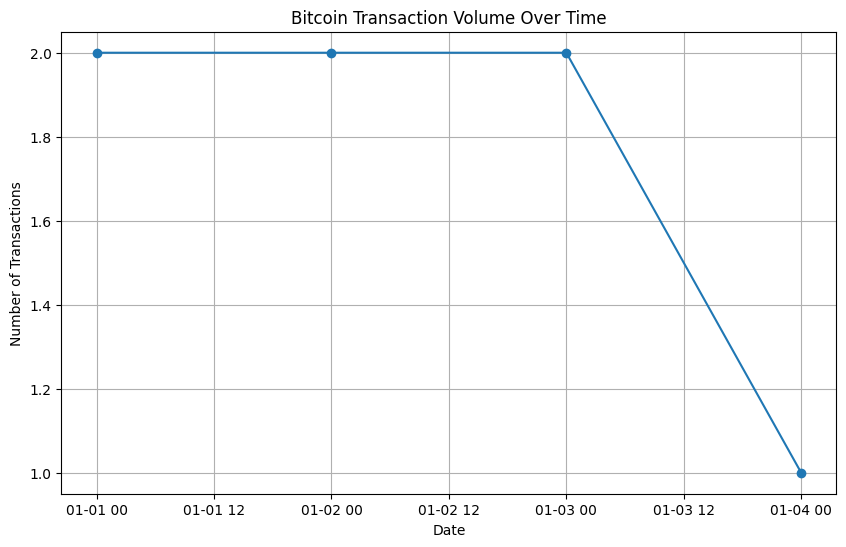

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'transaction_id': [1, 2, 3, 4, 5, 6, 7],
    'address_id': [100, 101, 102, 100, 101, 103, 104],
    'date': pd.to_datetime(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'])
}

df = pd.DataFrame(data)

# Aggregate the number of transactions per day
transaction_volume = df.groupby(df['date'].dt.date).size().reset_index(name='transaction_count')

# Plot the transaction volume over time
plt.figure(figsize=(10, 6))
plt.plot(transaction_volume['date'], transaction_volume['transaction_count'], marker='o')
plt.title('Bitcoin Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


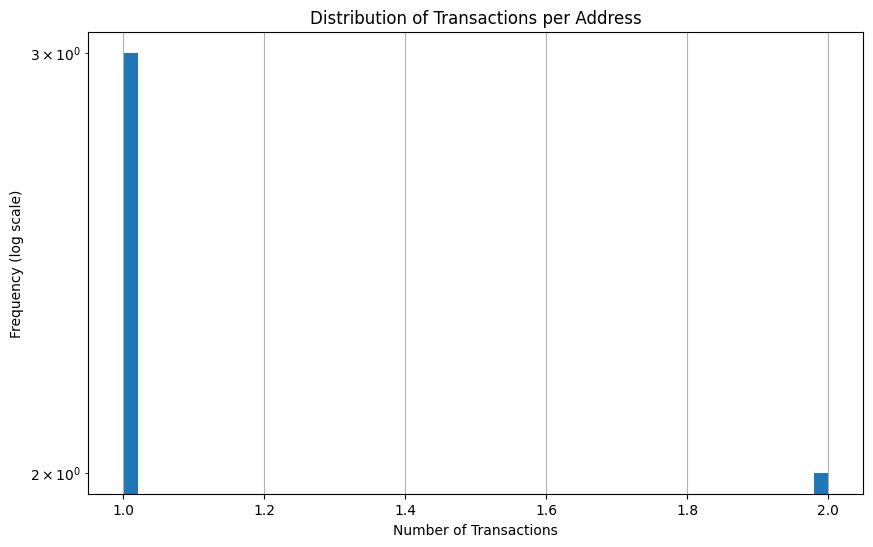

In [22]:
# Count the number of transactions per address
address_activity = df['address_id'].value_counts().reset_index(name='transaction_count')
address_activity.columns = ['address_id', 'transaction_count']

# Plot the distribution of transaction counts per address
plt.figure(figsize=(10, 6))
plt.hist(address_activity['transaction_count'], bins=50, log=True)
plt.title('Distribution of Transactions per Address')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()


Degree Centrality: {1: 0.09090909090909091, 100: 0.18181818181818182, 2: 0.09090909090909091, 101: 0.18181818181818182, 3: 0.09090909090909091, 102: 0.09090909090909091, 4: 0.09090909090909091, 5: 0.09090909090909091, 6: 0.09090909090909091, 103: 0.09090909090909091, 7: 0.09090909090909091, 104: 0.09090909090909091}
Betweenness Centrality: {1: 0.0, 100: 0.01818181818181818, 2: 0.0, 101: 0.01818181818181818, 3: 0.0, 102: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 103: 0.0, 7: 0.0, 104: 0.0}
Closeness Centrality: {1: 0.12121212121212122, 100: 0.18181818181818182, 2: 0.12121212121212122, 101: 0.18181818181818182, 3: 0.09090909090909091, 102: 0.09090909090909091, 4: 0.12121212121212122, 5: 0.12121212121212122, 6: 0.09090909090909091, 103: 0.09090909090909091, 7: 0.09090909090909091, 104: 0.09090909090909091}


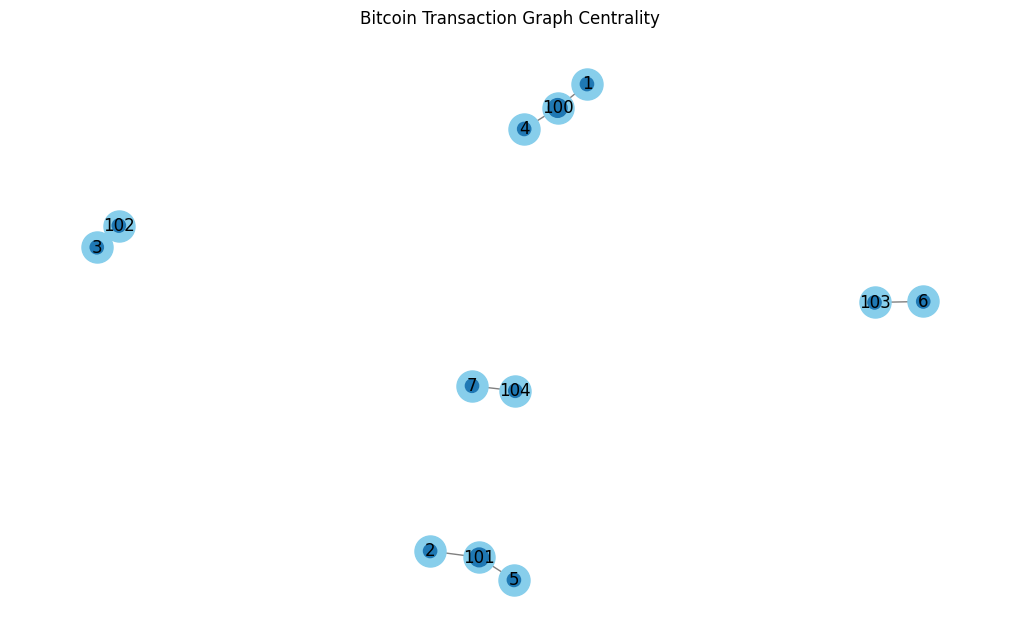

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample bipartite graph
G = nx.Graph()
edges = [(1, 100), (2, 101), (3, 102), (4, 100), (5, 101), (6, 103), (7, 104)]
G.add_edges_from(edges)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Print centrality measures
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)

# Visualize the graph with centrality measures
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=degree_centrality.keys(), node_size=[v * 1000 for v in degree_centrality.values()])
plt.title('Bitcoin Transaction Graph Centrality')
plt.show()



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


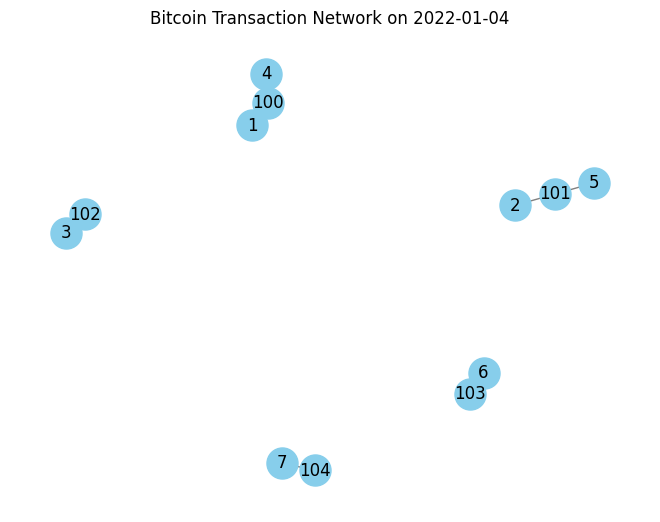

In [32]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation

# Create a sample bipartite graph with timestamps
G = nx.Graph()
edges = [
    (1, 100, '2022-01-01'), (2, 101, '2022-01-02'), (3, 102, '2022-01-03'),
    (4, 100, '2022-01-01'), (5, 101, '2022-01-02'), (6, 103, '2022-01-03'),
    (7, 104, '2022-01-04')
]

for u, v, date in edges:
    G.add_edge(u, v, date=date)

# Create a function to update the graph for animation
def update(num):
    plt.clf()
    sub_edges = [(u, v) for u, v, d in edges if d <= dates[num]]
    sub_G = G.edge_subgraph(sub_edges)
    pos = nx.spring_layout(sub_G)
    nx.draw(sub_G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
    plt.title(f'Bitcoin Transaction Network on {dates[num]}')

# Create the animation
dates = sorted(set(d for u, v, d in edges))
fig = plt.figure(figsize=(10, 6))
ani = FuncAnimation(fig, update, frames=len(dates), interval=1000, repeat=False)
plt.close()  # Close the static figure

from IPython.display import HTML
HTML(ani.to_jshtml())


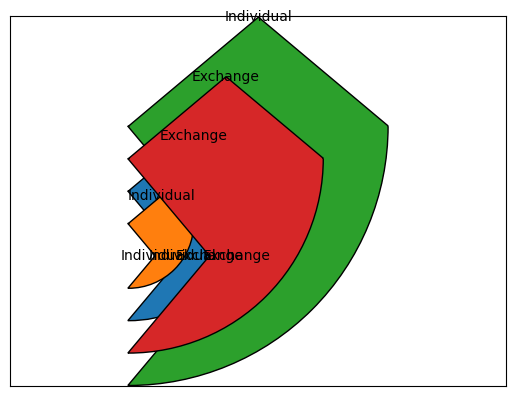

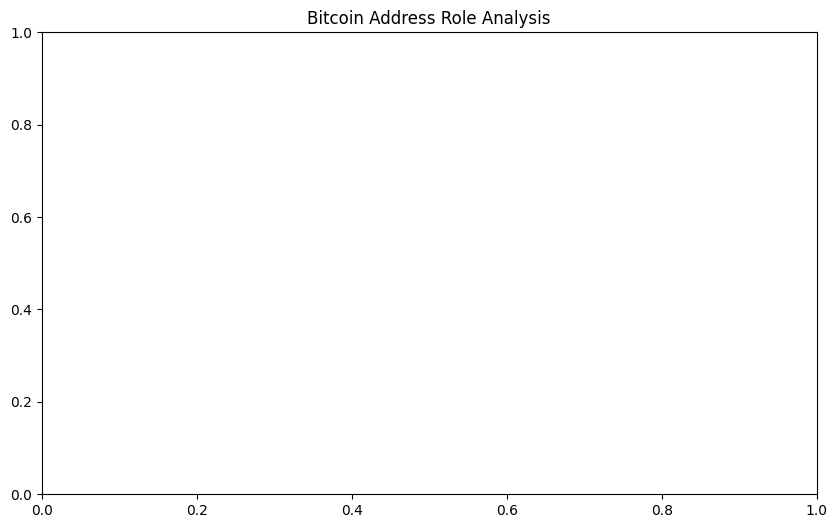

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Sample data
data = {
    'source': ['Individual', 'Individual', 'Exchange', 'Exchange'],
    'target': ['Exchange', 'Individual', 'Individual', 'Exchange'],
    'value': [100, 50, 200, 150]
}

df = pd.DataFrame(data)

# Create a Sankey diagram
sankey = Sankey(unit=None)
for index, row in df.iterrows():
    sankey.add(flows=[row['value'], -row['value']], labels=[row['source'], row['target']], orientations=[0, 1])
fig = plt.figure(figsize=(10, 6))
sankey.finish()

plt.title('Bitcoin Address Role Analysis')
plt.show()


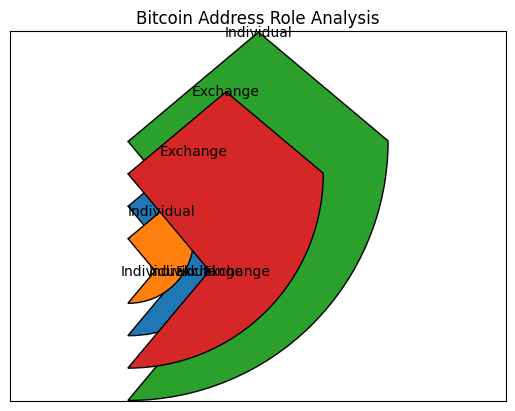

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Sample data
data = {
    'source': ['Individual', 'Individual', 'Exchange', 'Exchange'],
    'target': ['Exchange', 'Individual', 'Individual', 'Exchange'],
    'value': [100, 50, 200, 150]
}

df = pd.DataFrame(data)

# Create a Sankey diagram
sankey = Sankey(unit=None)
for index, row in df.iterrows():
    sankey.add(flows=[row['value'], -row['value']], labels=[row['source'], row['target']], orientations=[0, 1])
sankey.finish()

plt.title('Bitcoin Address Role Analysis')
plt.show()


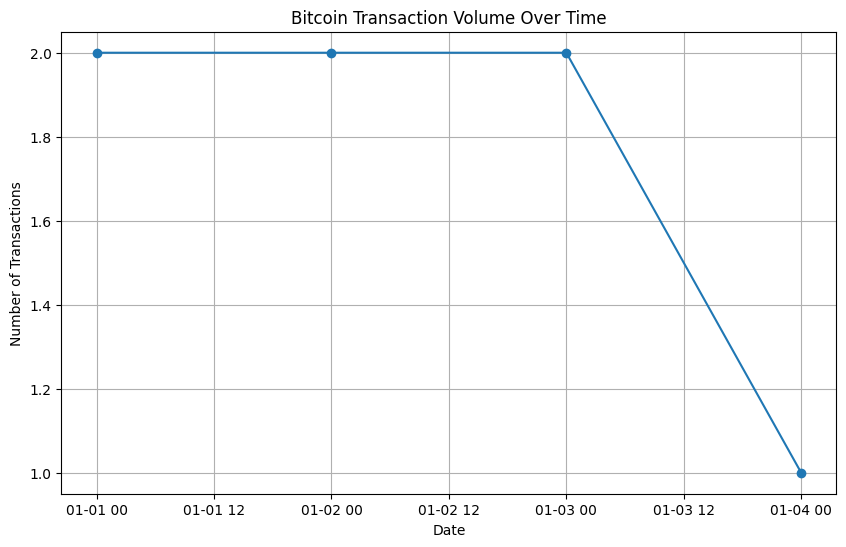

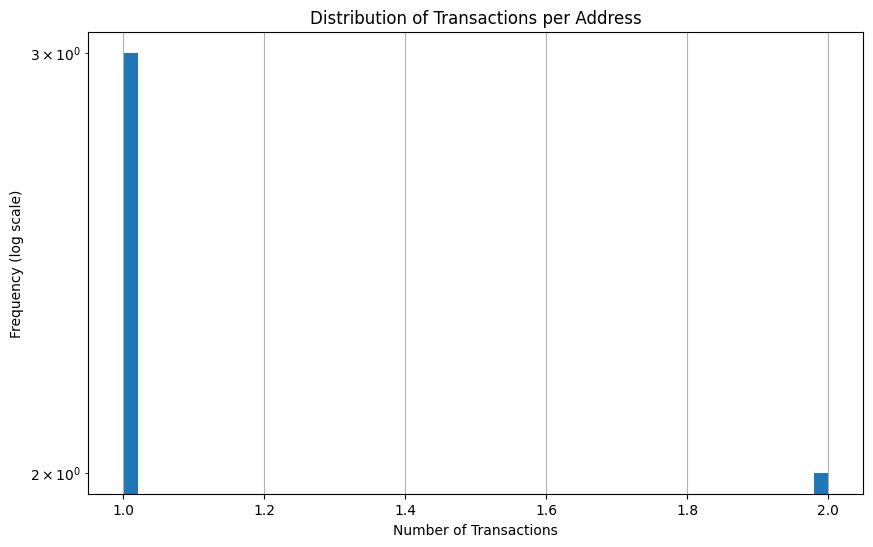

Degree Centrality: {1: 0.09090909090909091, 100: 0.18181818181818182, 2: 0.09090909090909091, 101: 0.18181818181818182, 3: 0.09090909090909091, 102: 0.09090909090909091, 4: 0.09090909090909091, 5: 0.09090909090909091, 6: 0.09090909090909091, 103: 0.09090909090909091, 7: 0.09090909090909091, 104: 0.09090909090909091}
Betweenness Centrality: {1: 0.0, 100: 0.01818181818181818, 2: 0.0, 101: 0.01818181818181818, 3: 0.0, 102: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 103: 0.0, 7: 0.0, 104: 0.0}
Closeness Centrality: {1: 0.12121212121212122, 100: 0.18181818181818182, 2: 0.12121212121212122, 101: 0.18181818181818182, 3: 0.09090909090909091, 102: 0.09090909090909091, 4: 0.12121212121212122, 5: 0.12121212121212122, 6: 0.09090909090909091, 103: 0.09090909090909091, 7: 0.09090909090909091, 104: 0.09090909090909091}


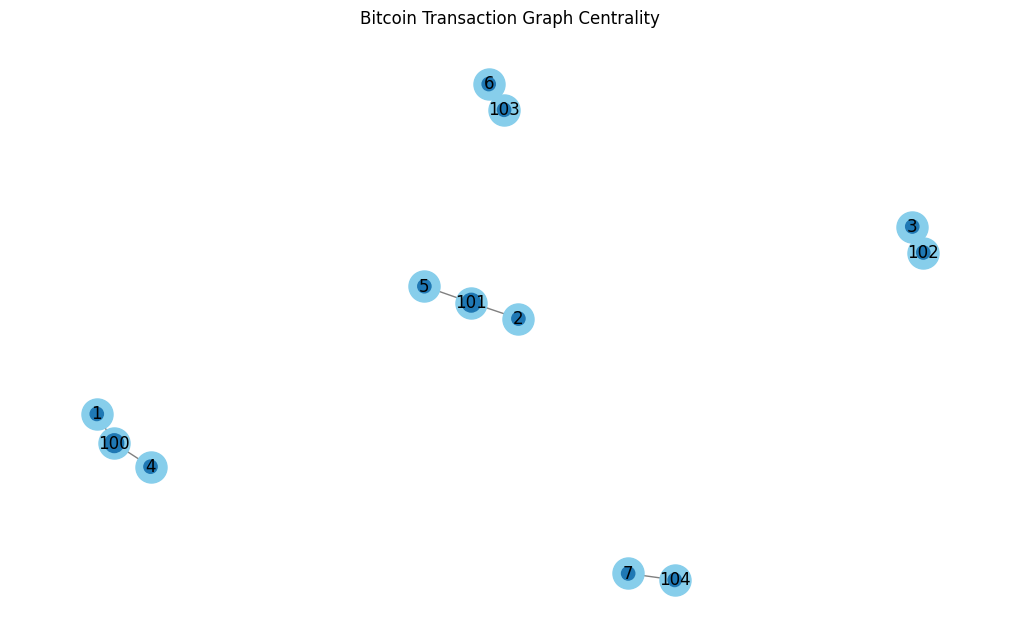

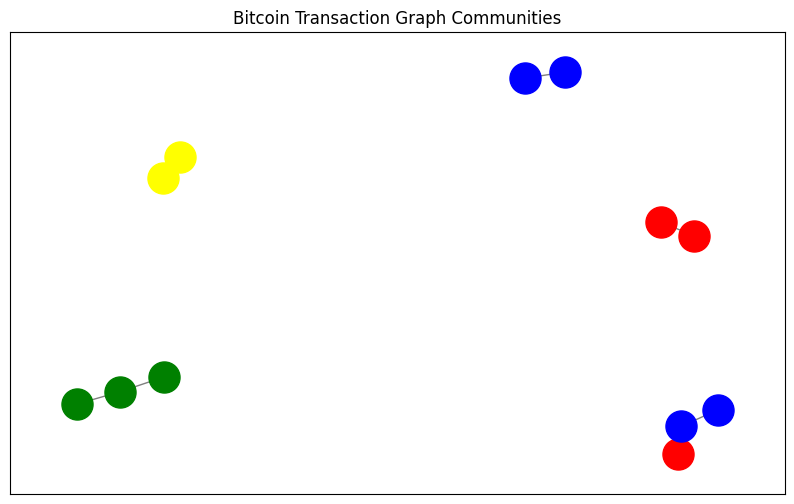

<Figure size 1000x600 with 0 Axes>

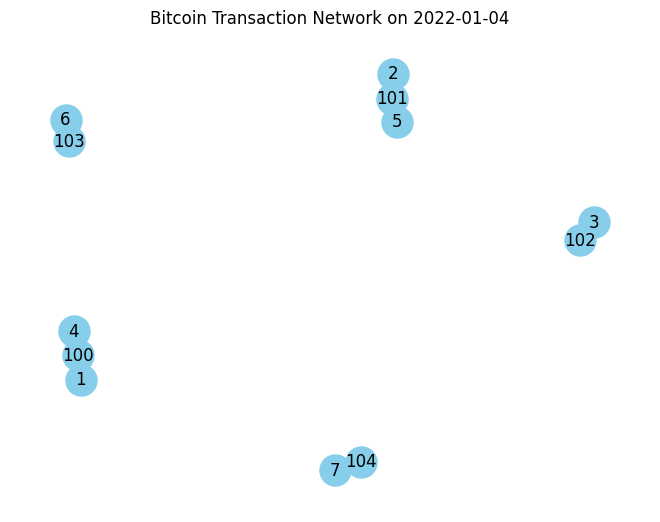

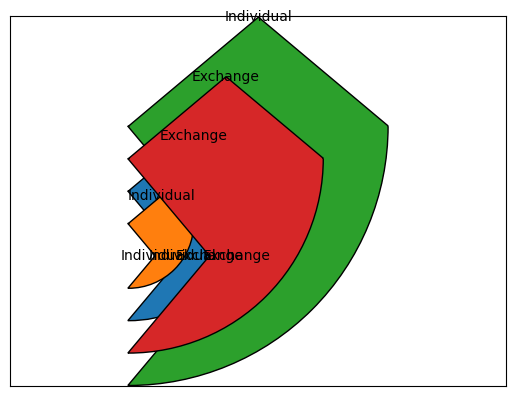

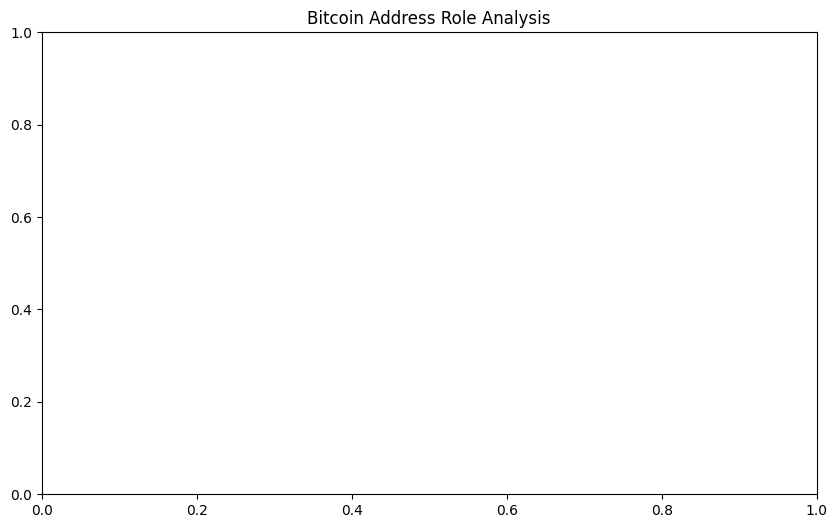

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
import itertools
from matplotlib.animation import FuncAnimation
from matplotlib.sankey import Sankey
from IPython.display import HTML

# Sample data for transaction volume and address activity
data = {
    'transaction_id': [1, 2, 3, 4, 5, 6, 7],
    'address_id': [100, 101, 102, 100, 101, 103, 104],
    'date': pd.to_datetime(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'])
}

df = pd.DataFrame(data)

# 1. Transaction Volume Over Time
transaction_volume = df.groupby(df['date'].dt.date).size().reset_index(name='transaction_count')
plt.figure(figsize=(10, 6))
plt.plot(transaction_volume['date'], transaction_volume['transaction_count'], marker='o')
plt.title('Bitcoin Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

# 2. Address Activity Distribution
address_activity = df['address_id'].value_counts().reset_index(name='transaction_count')
address_activity.columns = ['address_id', 'transaction_count']
plt.figure(figsize=(10, 6))
plt.hist(address_activity['transaction_count'], bins=50, log=True)
plt.title('Distribution of Transactions per Address')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()

# 3. Transaction Graph Centrality
G = nx.Graph()
edges = [(1, 100), (2, 101), (3, 102), (4, 100), (5, 101), (6, 103), (7, 104)]
G.add_edges_from(edges)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=degree_centrality.keys(), node_size=[v * 1000 for v in degree_centrality.values()])
plt.title('Bitcoin Transaction Graph Centrality')
plt.show()

# 4. Cluster Analysis
comp = community.girvan_newman(G)
communities = next(comp)  # Get the first partitioning step
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
colors = ['red', 'blue', 'green', 'yellow']
for i, community in enumerate(sorted(communities)):
    nx.draw_networkx_nodes(G, pos, community, node_size=500, node_color=colors[i % len(colors)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Bitcoin Transaction Graph Communities')
plt.show()

# 5. Temporal Network Analysis
G = nx.Graph()
edges = [
    (1, 100, '2022-01-01'), (2, 101, '2022-01-02'), (3, 102, '2022-01-03'),
    (4, 100, '2022-01-01'), (5, 101, '2022-01-02'), (6, 103, '2022-01-03'),
    (7, 104, '2022-01-04')
]
for u, v, date in edges:
    G.add_edge(u, v, date=date)
def update(num):
    plt.clf()
    sub_edges = [(u, v) for u, v, d in edges if d <= dates[num]]
    sub_G = G.edge_subgraph(sub_edges)
    pos = nx.spring_layout(sub_G)
    nx.draw(sub_G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
    plt.title(f'Bitcoin Transaction Network on {dates[num]}')
dates = sorted(set(d for u, v, d in edges))
fig = plt.figure(figsize=(10, 6))
ani = FuncAnimation(fig, update, frames=len(dates), interval=1000, repeat=False)
plt.show()
HTML(ani.to_jshtml())

# 6. Address Role Analysis
data = {
    'source': ['Individual', 'Individual', 'Exchange', 'Exchange'],
    'target': ['Exchange', 'Individual', 'Individual', 'Exchange'],
    'value': [100, 50, 200, 150]
}
df = pd.DataFrame(data)
sankey = Sankey(unit=None)
for index, row in df.iterrows():
    sankey.add(flows=[row['value'], -row['value']], labels=[row['source'], row['target']], orientations=[0, 1])
fig = plt.figure(figsize=(10, 6))
sankey.finish()
plt.title('Bitcoin Address Role Analysis')
plt.show()


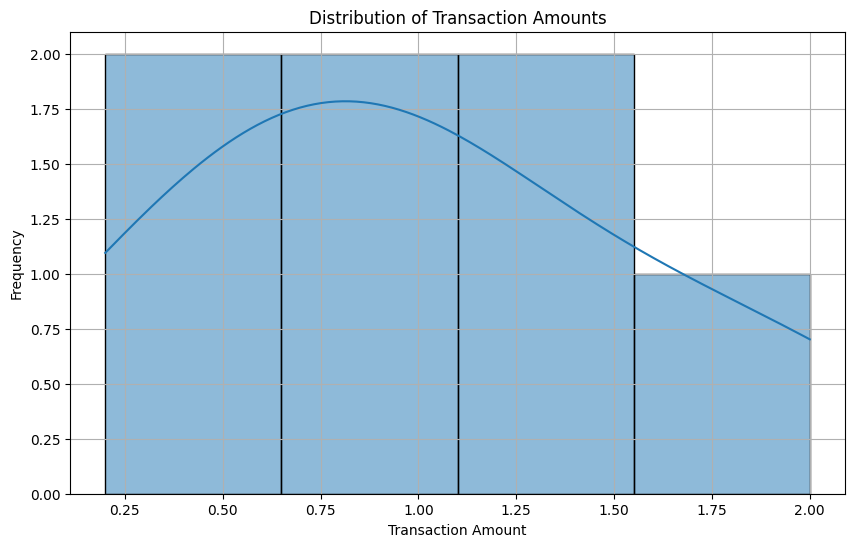

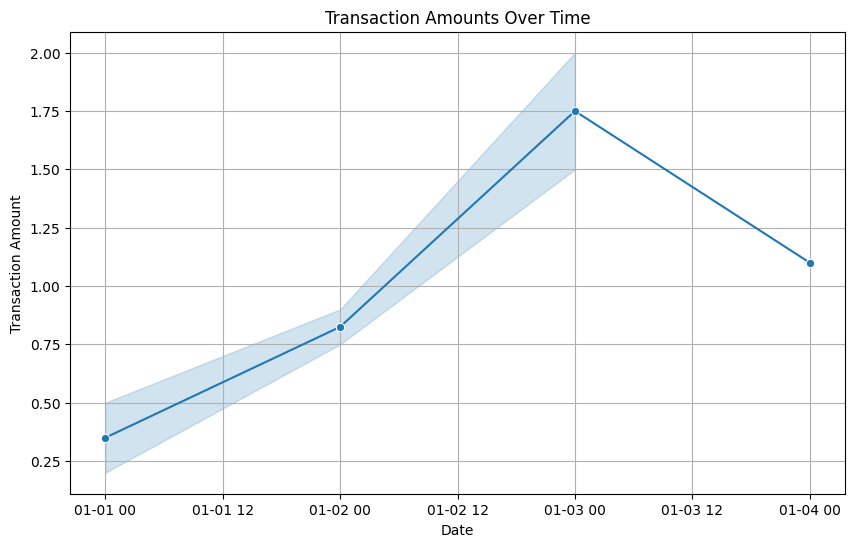

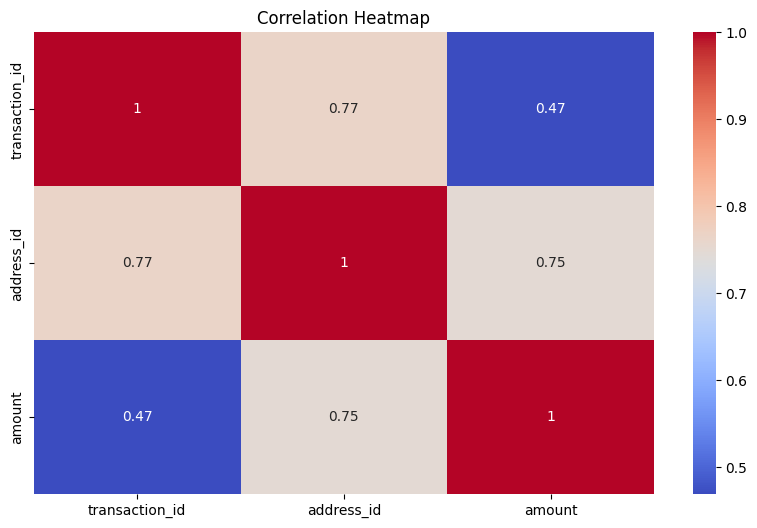

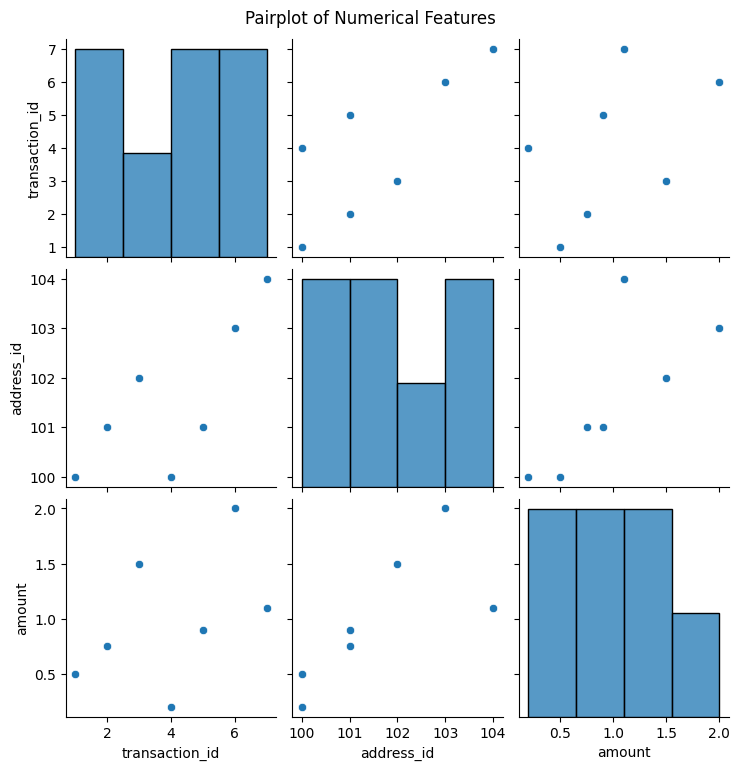

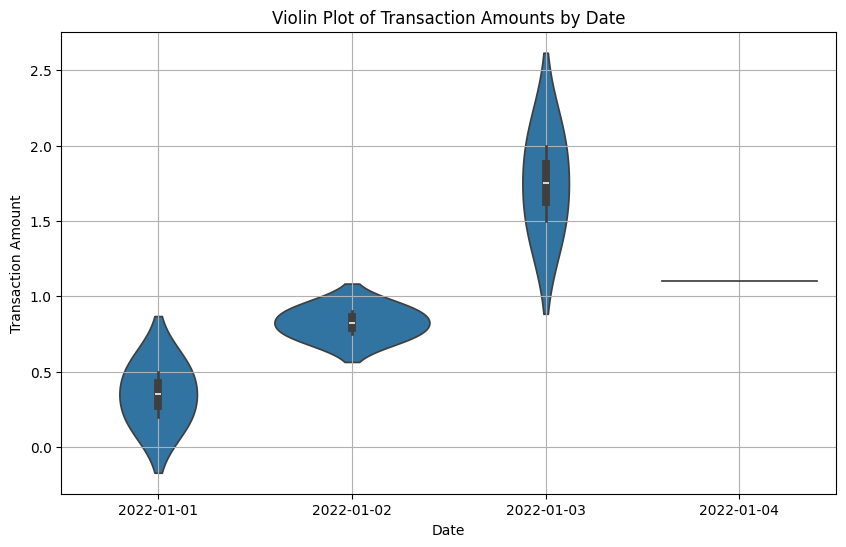

<Figure size 1000x600 with 0 Axes>

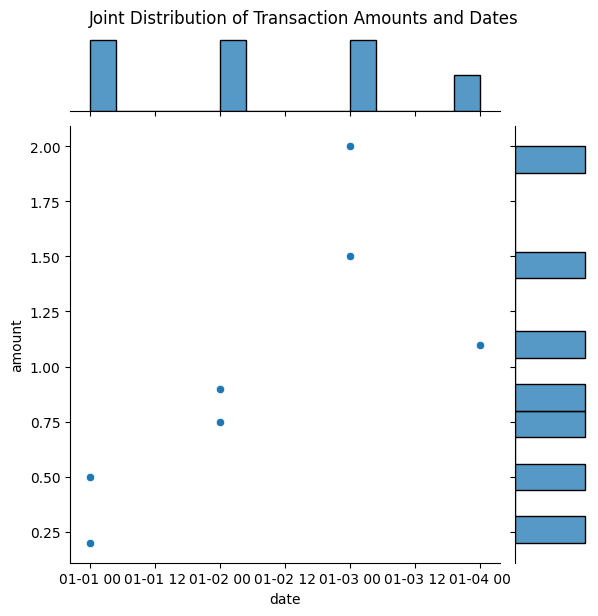

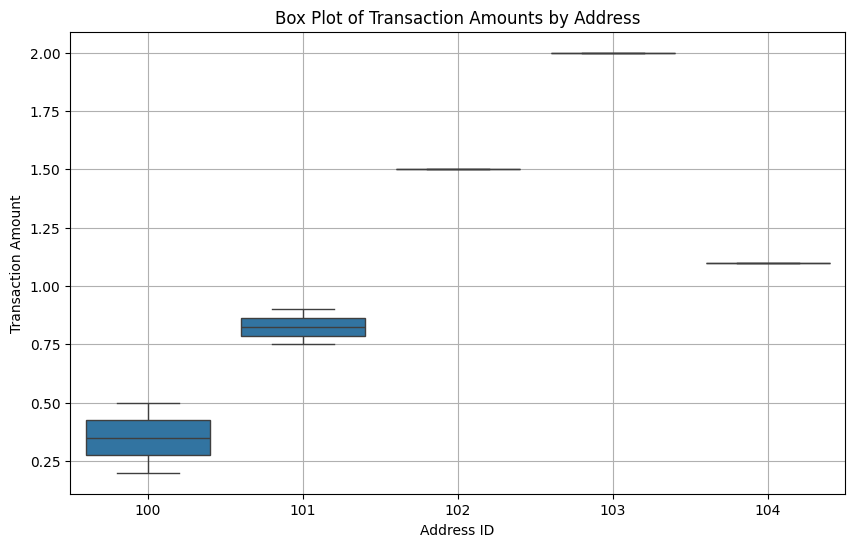

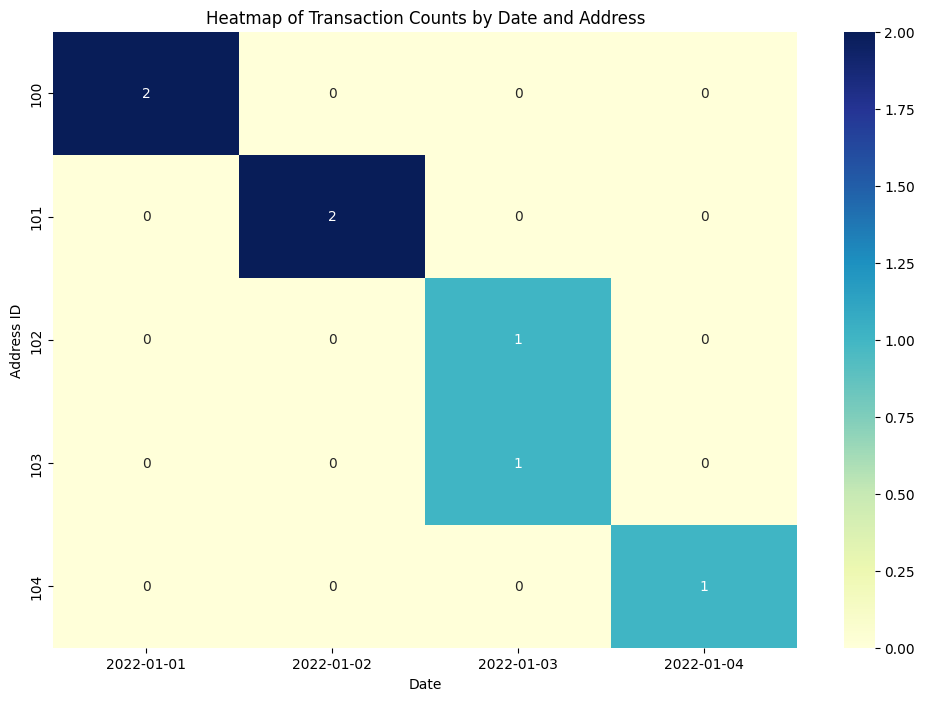

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'transaction_id': [1, 2, 3, 4, 5, 6, 7],
    'address_id': [100, 101, 102, 100, 101, 103, 104],
    'amount': [0.5, 0.75, 1.5, 0.2, 0.9, 2.0, 1.1],
    'date': pd.to_datetime(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'])
}

df = pd.DataFrame(data)

# 1. Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Transaction Amounts Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='amount', data=df, marker='o')
plt.title('Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

# 3. Correlation Heatmap
corr_matrix = df[['transaction_id', 'address_id', 'amount']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Pairplot of Numerical Features
sns.pairplot(df[['transaction_id', 'address_id', 'amount']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()
# 5. Violin Plot of Transaction Amounts by Date
plt.figure(figsize=(10, 6))
sns.violinplot(x='date', y='amount', data=df)
plt.title('Violin Plot of Transaction Amounts by Date')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

# 6. Joint Distribution Plot
plt.figure(figsize=(10, 6))
sns.jointplot(x='date', y='amount', data=df, kind='scatter', marginal_kws=dict(bins=15, fill=True))
plt.suptitle('Joint Distribution of Transaction Amounts and Dates', y=1.02)
plt.show()

# 7. Box Plot of Transaction Amounts by Address
plt.figure(figsize=(10, 6))
sns.boxplot(x='address_id', y='amount', data=df)
plt.title('Box Plot of Transaction Amounts by Address')
plt.xlabel('Address ID')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

# 8. Heatmap of Transaction Counts by Date and Address
# Prepare data for the heatmap
heatmap_data = df.pivot_table(index='address_id', columns=df['date'].dt.date, values='transaction_id', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heatmap of Transaction Counts by Date and Address')
plt.xlabel('Date')
plt.ylabel('Address ID')
plt.show()

In [39]:
pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 10.8 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 1.3 MB/s eta 0:00:001.2 MB/s eta 0:00:01m
Note: you may need to restart the kernel to use updated packages.


Descriptive Statistics:
        transaction_id  address_id     amount                 date
count        20.00000   20.000000  20.000000                   20
mean         10.50000  101.900000   1.098328  2022-01-10 12:00:00
min           1.00000  100.000000   0.115150  2022-01-01 00:00:00
25%           5.75000  101.000000   0.412820  2022-01-05 18:00:00
50%          10.50000  102.000000   1.214211  2022-01-10 12:00:00
75%          15.25000  103.000000   1.763222  2022-01-15 06:00:00
max          20.00000  104.000000   1.885904  2022-01-20 00:00:00
std           5.91608    1.410487   0.689223                  NaN

Advanced Descriptive Statistics:
Skewness: -0.24060958542072236
Kurtosis: -1.7677715006576484

Summary Statistics by Group:
            transaction_id                                             \
                    count       mean   min    25%   50%    75%   max   
address_id                                                             
100                   4.0   9.250000   

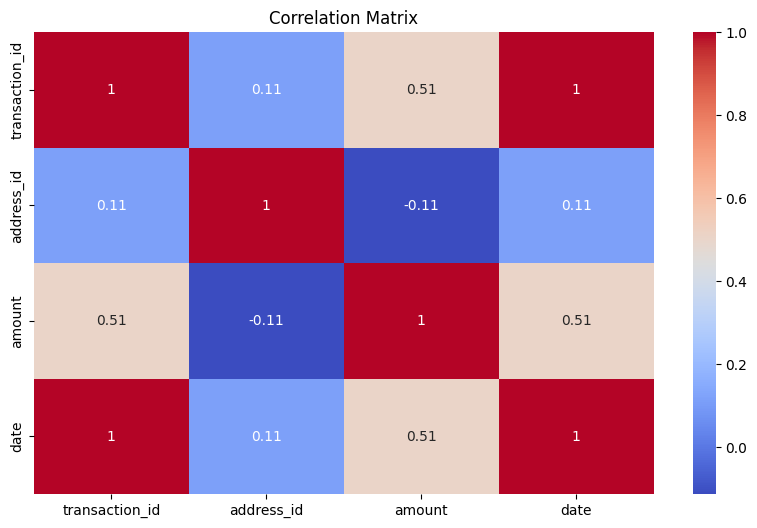


Hypothesis Testing:
T-statistic: 0.19764716126263174, P-value: 0.8512140674074175

Regression Analysis Summary:
                             OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     3.440
Date:                Tue, 11 Jun 2024   Prob (F-statistic):             0.0557
Time:                        15:12:47   Log-Likelihood:                -17.024
No. Observations:                  20   AIC:                             40.05
Df Residuals:                      17   BIC:                             43.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------

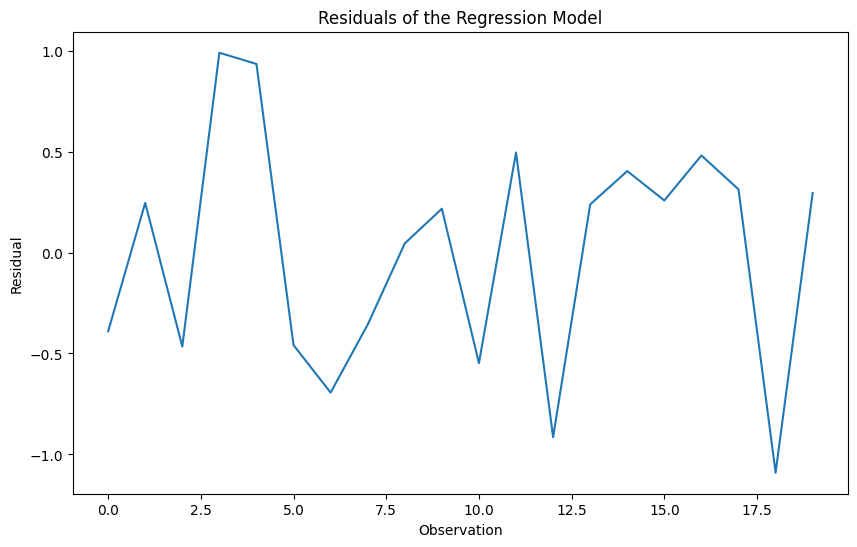

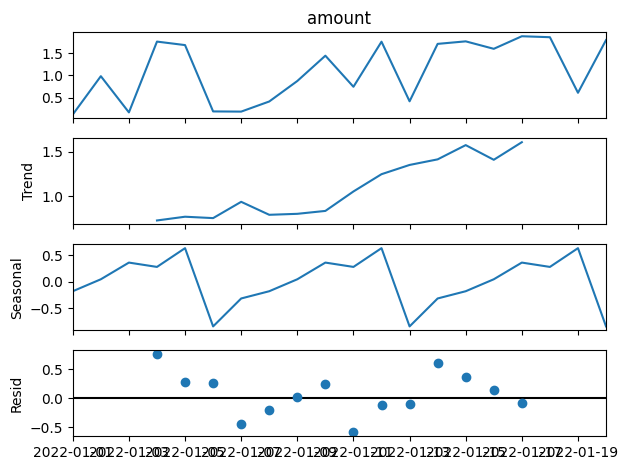


Shapiro-Wilk Test:
Statistic: 0.8410843690776099, P-value: 0.0037926278806811107

ANOVA Result:
                      sum_sq    df         F    PR(>F)
C(address_id)  13256.537310   4.0  0.645621  0.638454
Residual       76998.719986  15.0       NaN       NaN


<Figure size 1000x600 with 0 Axes>

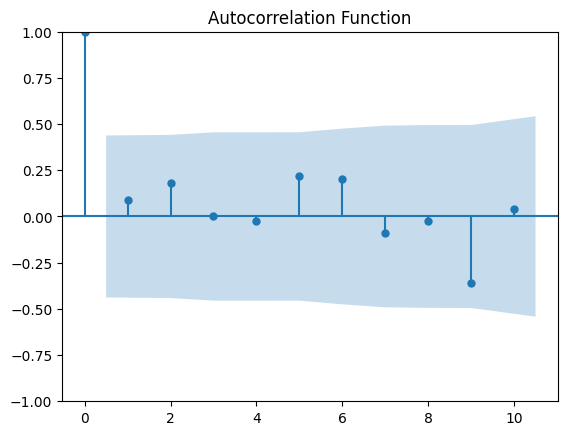

In [42]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Sample data for demonstration
data = {
    'transaction_id': np.arange(1, 21),
    'address_id': np.random.choice([100, 101, 102, 103, 104], 20),
    'amount': np.random.rand(20) * 2,
    'date': pd.date_range(start='2022-01-01', periods=20, freq='D')
}

df = pd.DataFrame(data)

# 1. Descriptive Statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Advanced Descriptive Statistics
skewness = df['amount'].skew()
kurtosis = df['amount'].kurt()
print("\nAdvanced Descriptive Statistics:")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Summary Statistics by Group
group_stats = df.groupby('address_id').describe()
print("\nSummary Statistics by Group:\n", group_stats)

# 2. Correlation Analysis
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Hypothesis Testing
group1 = df[df['address_id'] == 100]['amount']
group2 = df[df['address_id'] == 101]['amount']

if len(group1) > 1 and len(group2) > 1:
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"\nHypothesis Testing:\nT-statistic: {t_stat}, P-value: {p_value}")
else:
    print("\nHypothesis Testing: Not enough data for address_id 100 or 101.")

# 4. Regression Analysis
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

X = df[['address_id', 'date_ordinal']]
X = sm.add_constant(X)
y = df['amount']

model = sm.OLS(y, X).fit()
print("\nRegression Analysis Summary:\n", model.summary())

# Additional Regression Diagnostics
residuals = model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the Regression Model')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()

# 5. Time Series Analysis
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

df_daily = df['amount'].resample('D').sum().fillna(0)

decomposition = sm.tsa.seasonal_decompose(df_daily, model='additive')
fig = decomposition.plot()
plt.show()

# 6. Normality Test
shapiro_test = stats.shapiro(df['amount'])
print(f"\nShapiro-Wilk Test:\nStatistic: {shapiro_test[0]}, P-value: {shapiro_test[1]}")

# 7. ANOVA
anova_data = df.copy()
anova_data['amount'] = anova_data['amount'] * 100  # scaling to avoid precision issues
anova_model = sm.formula.ols('amount ~ C(address_id)', data=anova_data).fit()
anova_result = sm.stats.anova_lm(anova_model, typ=2)
print("\nANOVA Result:\n", anova_result)

# 8. Autocorrelation Analysis
plt.figure(figsize=(10, 6))
plot_acf(df_daily, lags=10)
plt.title('Autocorrelation Function')
plt.show()


In [43]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Coefficients: [0.11765992 0.0105823 ]
Intercept: -7822.743461815817
Mean squared error (MSE): 0.3274144879567079
Coefficient of determination (R^2): -3.4811106421482494
Confusion Matrix:
 [[0 0]
 [3 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.25      0.40         4

    accuracy                           0.25         4
   macro avg       0.50      0.12      0.20         4
weighted avg       1.00      0.25      0.40         4



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

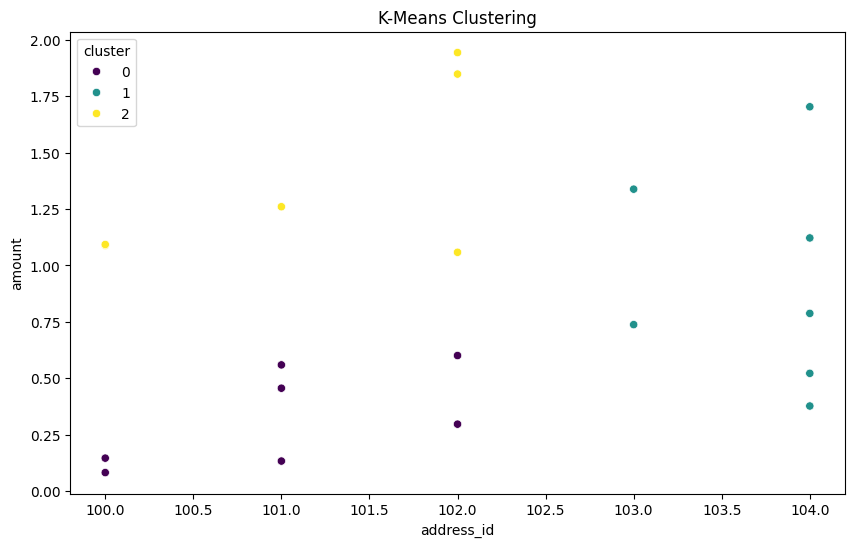

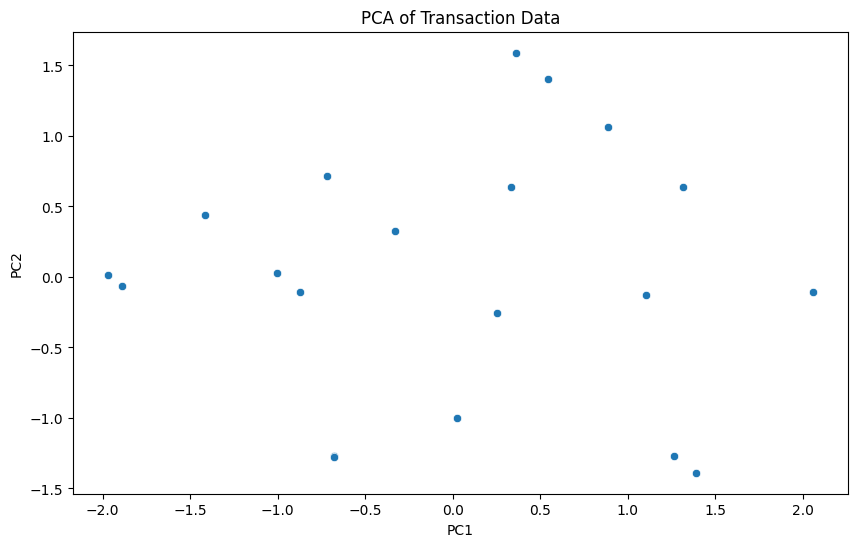

In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf

# Sample data for demonstration
data = {
    'transaction_id': np.arange(1, 21),
    'address_id': np.random.choice([100, 101, 102, 103, 104], 20),
    'amount': np.random.rand(20) * 2,
    'date': pd.date_range(start='2022-01-01', periods=20, freq='D')
}

df = pd.DataFrame(data)

# Linear Regression
X = df[['address_id', 'date']].copy()
X['date'] = X['date'].map(pd.Timestamp.toordinal)
y = df['amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Mean squared error (MSE):', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2):', r2_score(y_test, y_pred))

# Classification using Logistic Regression
df['high_amount'] = (df['amount'] > df['amount'].median()).astype(int)

X = df[['address_id', 'date']].copy()
X['date'] = X['date'].map(pd.Timestamp.toordinal)
y = df['high_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Clustering using K-Means
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['address_id', 'amount']])

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='address_id', y='amount', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Principal Component Analysis (PCA)
scaled_features = scaler.fit_transform(df[['address_id', 'amount']])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA of Transaction Data')
plt.show()


Explained Variance Ratio:
 [0.61736414 0.38263586]

Linear Regression Coefficients:
 [0.15110005 0.0380691 ]
Linear Regression Intercept:
 -28116.797368561776

Cluster Centers:
 [[  0.39299031 103.6       ]
 [ -1.21295646 101.83333333]
 [  0.83695892 101.25      ]]


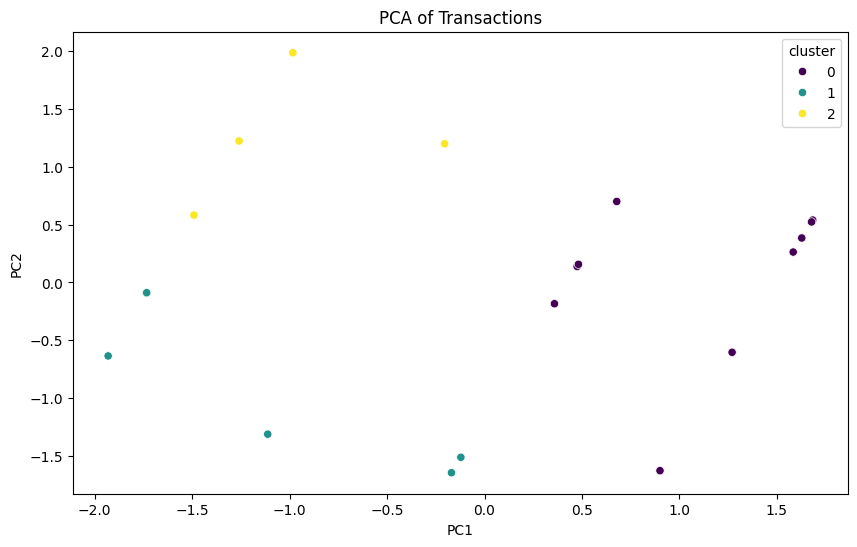

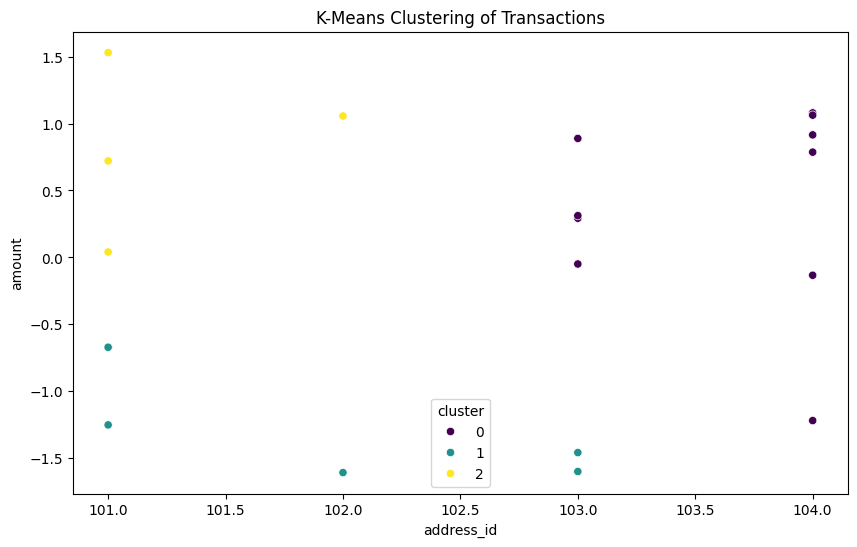

In [45]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Sample data for demonstration
data = {
    'transaction_id': np.arange(1, 21),
    'address_id': np.random.choice([100, 101, 102, 103, 104], 20),
    'amount': np.random.rand(20) * 2,
    'date': pd.date_range(start='2022-01-01', periods=20, freq='D')
}

df = pd.DataFrame(data)

# Standard Scaling
scaler = StandardScaler()
df[['amount']] = scaler.fit_transform(df[['amount']])

# 1. Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['amount', 'address_id']])
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)

# 2. Linear Regression
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)
X = df[['address_id', 'date_ordinal']]
y = df['amount']

reg = LinearRegression()
reg.fit(X, y)
print("\nLinear Regression Coefficients:\n", reg.coef_)
print("Linear Regression Intercept:\n", reg.intercept_)

# 3. Clustering with K-Means
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['amount', 'address_id']])
print("\nCluster Centers:\n", kmeans.cluster_centers_)

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=df['cluster'], palette='viridis')
plt.title('PCA of Transactions')
plt.show()

# Plot Clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='address_id', y='amount', data=df, hue='cluster', palette='viridis')
plt.title('K-Means Clustering of Transactions')
plt.show()
